In [1]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

from agent_class import make_agent

# Initialize environment and agent

In [2]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v2')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [3]:
parameters = {
    'N_actions': 4,
    'N_state': 8,
    'batch_size': 32,
    'discount_factor': 0.99,
    'epsilon_1': 0.01,
    'layers': [8, 128, 32, 4],
    'n_episodes_max': 3000,
    'n_memory': 20000,
    'n_solving_episodes': 50,
    'saving_stride': 500,
    'solving_threshold_mean': 270,
    'solving_threshold_min': 220,
    'training_stride': 5,
    'type': 'dqn',
}

# my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
my_agent = make_agent(parameters=parameters)

# Train agent

In [4]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True,
                                 model_filename="agent-dqn.pt")

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 50 episodes)  | (last 50 episodes) |
|-----------------------------------------------------------------------
|     100 |      -61.775    |       -492.291      |      -168.773      |
|     200 |      -56.143    |       -503.929      |      -200.152      |
|     300 |     -144.134    |       -382.707      |      -141.942      |
|     400 |      -39.327    |       -238.028      |       -92.739      |
|     500 |      -64.885    |       -485.547      |      -100.904      |


KeyboardInterrupt: 

# Plot training stats

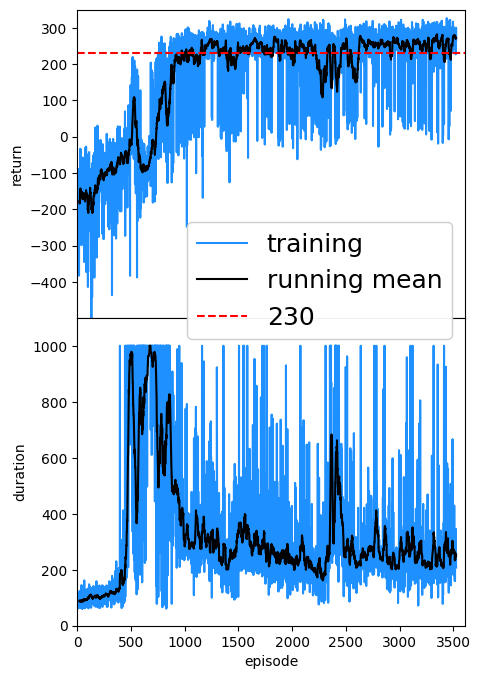

In [ ]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale, 
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [8]:
# There is the issue that the game window freezes when running gym games 
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [10]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v2',render_mode='human'))

N_episodes = 1

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

[ 0.007125    1.4075737   0.3536978  -0.08728378 -0.00603031 -0.03715588
  0.          0.        ]
[ 0.01056643  1.4050019   0.34406292 -0.11430419 -0.00595433  0.0015194
  0.          0.        ]
[ 0.01391916  1.4018224   0.33292776 -0.14129877 -0.0036467   0.04615711
  0.          0.        ]
[ 1.7182350e-02  1.3980323e+00  3.2171828e-01 -1.6845134e-01
  9.0561860e-04  9.1054976e-02  0.0000000e+00  0.0000000e+00]
[ 0.02037687  1.3936324   0.31309846 -0.19555895  0.0071824   0.12554732
  0.          0.        ]
[ 0.02350645  1.3886274   0.30495763 -0.22250943  0.01508703  0.15810713
  0.          0.        ]
[ 0.02655773  1.3830156   0.29515818 -0.24953727  0.02495195  0.19731669
  0.          0.        ]
[ 0.02951994  1.3767977   0.283984   -0.27660453  0.03705224  0.24202804
  0.          0.        ]
[ 0.03248167  1.3699815   0.28394824 -0.30328336  0.04915001  0.24197741
  0.          0.        ]
[ 0.03544293  1.3625673   0.28391325 -0.32996285  0.06124625  0.24194677
  0.         

We also create a video file containing 20 games played by the agent

In [13]:
from gymnasium.wrappers.monitoring import video_recorder

env = gym.make('LunarLander-v2', render_mode="rgb_array")
video = video_recorder.VideoRecorder(env, './video.mp4'.format())

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        video.capture_frame()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

video.close()
env.close()

Run 1: duration = 301, total return = 261.450
Run 2: duration = 1000, total return = 140.273
Run 3: duration = 256, total return = 240.510
Run 4: duration = 1000, total return = 140.287
Run 5: duration = 225, total return = 224.063
Run 6: duration = 255, total return = 248.000
Run 7: duration = 240, total return = 227.296
Run 8: duration = 273, total return = 242.628
Run 9: duration = 1000, total return = -99.856
Run 10: duration = 228, total return = 250.840
Run 11: duration = 278, total return = 257.135
Run 12: duration = 276, total return = 266.938
Run 13: duration = 262, total return = 257.996
Run 14: duration = 1000, total return = 139.208
Run 15: duration = 299, total return = 213.680
Run 16: duration = 362, total return = 244.364
Run 17: duration = 260, total return = 272.699
Run 18: duration = 1000, total return = 114.247
Run 19: duration = 279, total return = 257.258
Run 20: duration = 287, total return = 246.689
Moviepy - Building video ./video.mp4.
Moviepy - Writing video ./

/home/asger/.pyenv/versions/dmiai/lib/python3.11/site-packages/gymnasium/wrappers/monitoring/video_recorder.py:178: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


TypeError: must be real number, not NoneType